In [15]:
import numpy as np
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

In [3]:
x=np.array([ele for ele in range(30)])
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [176]:
# /home/xiechen/Gene_Experiment
with open("/home/xiechen/heuristic-tsp/GeneTrial/Result/Simulated_Annealing/SA_G200_80.txt", "r") as f:
    data = f.readlines()
data1 = [ele.replace('\n','') for ele in data]
# values:
valueStr = data1[0].split(' ')
values = [1646.42 - float(ele) for ele in valueStr[1:]]
# calculation times:
simulAnnealtime_Str = data1[1].split(' ')
simulAnnealtime = [float(ele) for ele in simulAnnealtime_Str[1:]]

In [ ]:
with open("/home/xiechen/heuristic-tsp/GeneTrial/Result/rand_G200_80.txt", "r") as f:
    data = f.readlines()
data1 = [ele.replace('\n','') for ele in data]
# values:
valueStr = data1[0].split(' ')
values = [1646.42 - float(ele) for ele in valueStr[1:]]
# calculation times:
calc_timeStr = data1[2].split(' ')
calc_time = [float(ele) for ele in calc_timeStr[1:]]
# nbIterationLS
nbIterLS_Str = data1[1].split(' ')
nbIterLS = [int(ele) for ele in nbIterLS_Str[1:]]

In [149]:
#x = ['ATL','LAX','CLT','LAS','MSP','DTW','PHX','DCA','SLC','ORD','DFW','PHL','PDX','DEN','IAH','BOS','SAN','BWI','MDW','IND']
# k_in = [4.995,334.137,600,600]
# k_out = [984,1311,1858,2353]
# p = [10805,11905,16850,19555]
# K = [28,28,28,28]


x=np.array([ele for ele in range(30)])


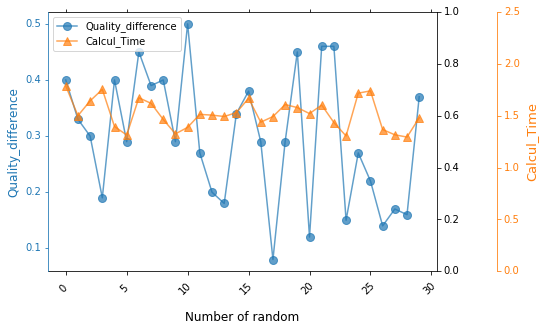

In [177]:
fig = plt.figure(1) #定义figure
 
ax_k = HostAxes(fig, [0, 0, 0.9, 0.9]) #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1
 
#parasite addtional axes, share x
ax_p = ParasiteAxes(ax_k, sharex=ax_k)
ax_K = ParasiteAxes(ax_k, sharex=ax_k)
ax_Z = ParasiteAxes(ax_k, sharex=ax_k)
#append axes
ax_k.parasites.append(ax_p)
ax_k.parasites.append(ax_K)
ax_k.parasites.append(ax_Z)
# -----------------------
ax_k.set_xlabel('Number of random')
ax_k.set_ylabel('Quality_difference')
ax_k.axis['bottom'].major_ticklabels.set_rotation(45)
ax_k.axis['bottom','left'].label.set_fontsize(12) # 设置轴label的大小
ax_k.axis['bottom'].major_ticklabels.set_pad(8) #设置x轴坐标刻度与x轴的距离，坐标轴刻度旋转会使label和坐标轴重合
ax_k.axis['bottom'].label.set_pad(20) #设置x轴坐标刻度与x轴label的距离，label会和坐标轴刻度重合
ax_k.axis[:].major_ticks.set_tick_out(True) #设置坐标轴上刻度突起的短线向外还是向内
#invisible right axis of ax_k
ax_k.axis['right'].set_visible(False)
ax_k.axis['top'].set_visible(True)

K_axisline = ax_K.get_grid_helper().new_fixed_axis
ax_p.axis['right'] = K_axisline(loc='right', axes=ax_p, offset=(0,0))
ax_p.axis['right'].major_ticks.set_tick_out(True)
ax_p.axis['right'].label.set_fontsize(13)
K_axisline = ax_K.get_grid_helper().new_fixed_axis
ax_K.axis['right2'] = K_axisline(loc='right', axes=ax_K, offset=(60,0))
ax_K.axis['right2'].major_ticks.set_tick_out(True)
ax_K.axis['right2'].label.set_fontsize(13)
# K_axisline = ax_Z.get_grid_helper().new_fixed_axis
# ax_Z.axis['right3'] = K_axisline(loc='right', axes=ax_Z, offset=(120,0))
# ax_Z.axis['right3'].major_ticks.set_tick_out(True)
# ax_Z.axis['right3'].label.set_fontsize(13)    
fig.add_axes(ax_k)
#-------------------------------
# ax_p.axis['right'].set_visible(True)
# ax_p.axis['right'].major_ticklabels.set_visible(True)
# ax_p.axis['right'].label.set_visible(True)
# ax_p.axis['right'].major_ticks.set_tick_out(True)
# ax_p.set_ylabel('NbIterationLS')
# ax_p.axis['right'].label.set_fontsize(13)
#--------------------------
ax_K.axis['right2'].set_visible(True)
ax_K.axis['right2'].major_ticklabels.set_visible(True)
ax_K.axis['right2'].label.set_visible(True)
ax_K.axis['right2'].major_ticks.set_tick_out(True)
ax_K.set_ylabel('Calcul_Time')
ax_K.axis['right2'].label.set_fontsize(13)
#------------------------
# ax_Z.axis['right3'].set_visible(True)
# ax_Z.axis['right3'].major_ticklabels.set_visible(True)
# ax_Z.axis['right3'].label.set_visible(True)
# ax_Z.axis['right3'].major_ticks.set_tick_out(True)
# ax_Z.set_ylabel('Nombre de intervenants')
# ax_Z.axis['right3'].label.set_fontsize(13)
 

# k -> curve_values
# K -> curve_cal_time
# p -> curve_IterLS
# Z

curve_values, = ax_k.plot(x, values, marker ='o',markersize=8,label="Quality_difference",alpha = 0.7)
curve_cal_time, = ax_K.plot(x, simulAnnealtime, marker ='^',markersize=8, label="Calcul_Time",alpha = 0.7)
# curve_IterLS, = ax_p.plot(x, nbIterLS, marker ='P',markersize=8,label="NbIterationLS",alpha = 0.7)
# curve_Z, = ax_Z.plot(x, K, marker ='o',markersize=8, label="Nombre de intervenants",alpha = 0.7)

ax_k.axis['bottom'].major_ticklabels.set_rotation(45)
 
# ax_k.set_rotation(90)
# plt.xticks(list(range(20)), x, rotation = 'vertical')
#ax_k.set_ylim(0,600)
# ax_p.set_ylim(1,120)
ax_K.set_ylim(0,2.5)
# ax_Z.set_ylim(25,30)
ax_k.legend(labelspacing = 0.4, fontsize = 10)
 
#轴名称，刻度值的颜色 
ax_k.axis['left'].label.set_color(curve_values.get_color())
# ax_p.axis['right'].label.set_color(curve_IterLS.get_color()) # 坐标轴label的颜色
ax_K.axis['right2'].label.set_color(curve_cal_time.get_color())
# ax_Z.axis['right3'].label.set_color(curve_Z.get_color())
ax_k.axis['left'].major_ticks.set_color(curve_values.get_color())
# ax_p.axis['right'].major_ticks.set_color(curve_IterLS.get_color()) # 坐标轴刻度小突起的颜色
ax_K.axis['right2'].major_ticks.set_color(curve_cal_time.get_color())
# ax_Z.axis['right3'].major_ticks.set_color(curve_Z.get_color())
ax_k.axis['left'].major_ticklabels.set_color(curve_values.get_color())
# ax_p.axis['right'].major_ticklabels.set_color(curve_IterLS.get_color()) # 坐标轴刻度值的颜色
ax_K.axis['right2'].major_ticklabels.set_color(curve_cal_time.get_color())
# ax_Z.axis['right3'].major_ticklabels.set_color(curve_Z.get_color())
ax_k.axis['left'].line.set_color(curve_values.get_color())
# ax_p.axis['right'].line.set_color(curve_IterLS.get_color()) # 坐标轴线的颜色
ax_K.axis['right2'].line.set_color(curve_cal_time.get_color())
# ax_Z.axis['right3'].line.set_color(curve_Z.get_color())
plt.savefig('10.key metrics mapping.pdf', bbox_inches='tight', dpi=800)
plt.show()